In [2]:
import pandas as pd
import numpy as np

In [3]:
model_metrics = pd.read_csv("C:/Users/anime/Algorithmic-Fairness-in-Recidivism-Forecasting-Algorithms/Fairness Metrics - All Predicted Outcome Binary Metrics from Verma Paper.csv")

In [4]:
model_metrics.head()

,Unnamed: 0,Accuracy of Logistic Regression Algorithm,Accuracy of LDA Algorithm,Accuracy of XgBoost,Accuracy of Random Forest,Black PPR RF,Black PPR XG,Black PPR LDA,Black PPR LR,White PPR RF,...,White NPR among NP LDA,White NPR among NP LR,Black Accuracy under Random Forest,White Accuracy under Random Forest,White Accuracy under XG,Black Accuracy under XG,White Accuracy under LDA,Black Accuracy under LDA,White Accuracy under LR,Black Accuracy under LR
0,0,0.650485,0.669903,0.728155,0.699029,0.263158,0.350877,0.298246,0.315789,0.239130,...,1.0,1.0,0.701754,0.695652,0.739130,0.719298,0.673913,0.666667,0.652174,0.649123
1,1,0.757282,0.766990,0.815534,0.747573,0.290323,0.274194,0.258065,0.290323,0.414634,...,1.0,1.0,0.709677,0.804878,0.853659,0.790323,0.804878,0.741935,0.731707,0.774194
2,2,0.669903,0.708738,0.766990,0.718447,0.337838,0.364865,0.297297,0.270270,0.586207,...,1.0,1.0,0.702703,0.758621,0.724138,0.783784,0.758621,0.689189,0.827586,0.608108
3,3,0.601942,0.689320,0.737864,0.699029,0.238095,0.269841,0.285714,0.095238,0.225000,...,1.0,1.0,0.698413,0.700000,0.700000,0.761905,0.700000,0.682540,0.625000,0.587302
4,4,0.592233,0.699029,0.699029,0.679612,0.183673,0.306122,0.244898,0.102041,0.296296,...,1.0,1.0,0.734694,0.629630,0.666667,0.734694,0.685185,0.714286,0.611111,0.571429


In [5]:
model_metrics.columns

Index(['Unnamed: 0', 'Accuracy of Logistic Regression Algorithm',
       'Accuracy of LDA Algorithm', 'Accuracy of XgBoost',
       'Accuracy of Random Forest', 'Black PPR RF', 'Black PPR XG',
       'Black PPR LDA', 'Black PPR LR', 'White PPR RF', 'White PPR XG',
       'White PPR LDA', 'White PPR LR', 'Black NPR RF', 'Black NPR XG',
       'Black NPR LDA', 'Black NPR LR', 'White NPR RF', 'White NPR XG',
       'White NPR LDA', 'White NPR LR', 'Black TPR RF', 'Black TPR XG',
       'Black TPR LDA', 'Black TPR LR', 'White TPR RF', 'White TPR XG',
       'White TPR LDA', 'White TPR LR', 'Black FPR RF', 'Black FPR XG',
       'Black FPR LDA', 'Black FPR LR', 'White FPR RF', 'White FPR XG',
       'White FPR LDA', 'White FPR LR', 'Black TNR RF', 'Black TNR XG',
       'Black TNR LDA', 'Black TNR LR', 'White TNR RF', 'White TNR XG',
       'White TNR LDA', 'White TNR LR', 'Black FNR RF', 'Black FNR XG',
       'Black FNR LDA', 'Black FNR LR', 'White FNR RF', 'White FNR XG',
       'White F

In [6]:
model_metrics['Accuracy of Logistic Regression Algorithm'].mean()

0.6568932038834951

In [8]:
model_metrics['Accuracy of Random Forest'].mean()

0.722252427184466

In [9]:
model_metrics['Accuracy of LDA Algorithm'].mean()

0.7149902912621359

In [10]:
model_metrics['Accuracy of XgBoost'].mean()

0.7373203883495146

In [12]:
model_metrics.columns

Index(['Unnamed: 0', 'Accuracy of Logistic Regression Algorithm',
       'Accuracy of LDA Algorithm', 'Accuracy of XgBoost',
       'Accuracy of Random Forest', 'Black PPR RF', 'Black PPR XG',
       'Black PPR LDA', 'Black PPR LR', 'White PPR RF', 'White PPR XG',
       'White PPR LDA', 'White PPR LR', 'Black NPR RF', 'Black NPR XG',
       'Black NPR LDA', 'Black NPR LR', 'White NPR RF', 'White NPR XG',
       'White NPR LDA', 'White NPR LR', 'Black TPR RF', 'Black TPR XG',
       'Black TPR LDA', 'Black TPR LR', 'White TPR RF', 'White TPR XG',
       'White TPR LDA', 'White TPR LR', 'Black FPR RF', 'Black FPR XG',
       'Black FPR LDA', 'Black FPR LR', 'White FPR RF', 'White FPR XG',
       'White FPR LDA', 'White FPR LR', 'Black TNR RF', 'Black TNR XG',
       'Black TNR LDA', 'Black TNR LR', 'White TNR RF', 'White TNR XG',
       'White TNR LDA', 'White TNR LR', 'Black FNR RF', 'Black FNR XG',
       'Black FNR LDA', 'Black FNR LR', 'White FNR RF', 'White FNR XG',
       'White F

In [76]:
from scipy.stats import t
import seaborn as sns
def t_test_visualizer(col1, col2, two_tailed, greater_than, less_than, alpha):
  
    x1 = model_metrics[col1]
    x2 = model_metrics[col2]
    sp = (len(x1) - 1) * (x1.std()**2)
    sp += ((len(x2) - 1) * (x2.std()**2))
    sp /= (len(x1) + len(x2) - 2)
    sp = sp**0.5
    print((sp * (1/len(x1) + 1/len(x2))))
    test_stat = (x1.mean() - x2.mean())/(sp * (1/len(x1) + 1/len(x2)))
    df = len(x1) + len(x2) - 2
    pval = 0
    disparity = 0
    if greater_than == True:

        pval = 1 - t.cdf(test_stat,df)
        disparity = x1.mean() - x2.mean()

    elif less_than == True:

        pval = t.cdf(test_stat,df)
        disparity = x2.mean() - x1.mean()


    else:

        pval = 2 * (1 - t.cdf(np.abs(test_stat), df))
        disparity = np.abs(x1.mean() - x2.mean())
        
    means = [x1.mean(), x2.mean()]
    std_errs = [x1.std(ddof=1) / np.sqrt(len(x1.dropna())),
            x2.std(ddof=1) / np.sqrt(len(x2.dropna()))]

    labels = [col1,col2]

    plt.bar(labels, means, yerr=std_errs, capsize=5, color=['skyblue', 'salmon'])
    plt.ylabel('Mean Value')
 #   plt.title('Mean ± SE by Group')
    # Annotate t-test result
    plt.title(f"Mean ± SE by Column\n t={test_stat:.2f}, p={pval:.3f}, disparity = {disparity: .3f}")
    plt.xlabel("Group")
   # plt.ylabel("Density")
    plt.legend()
    plt.show()

In [77]:
model_metrics.columns

Index(['Unnamed: 0', 'Accuracy of Logistic Regression Algorithm',
       'Accuracy of LDA Algorithm', 'Accuracy of XgBoost',
       'Accuracy of Random Forest', 'Black PPR RF', 'Black PPR XG',
       'Black PPR LDA', 'Black PPR LR', 'White PPR RF', 'White PPR XG',
       'White PPR LDA', 'White PPR LR', 'Black NPR RF', 'Black NPR XG',
       'Black NPR LDA', 'Black NPR LR', 'White NPR RF', 'White NPR XG',
       'White NPR LDA', 'White NPR LR', 'Black TPR RF', 'Black TPR XG',
       'Black TPR LDA', 'Black TPR LR', 'White TPR RF', 'White TPR XG',
       'White TPR LDA', 'White TPR LR', 'Black FPR RF', 'Black FPR XG',
       'Black FPR LDA', 'Black FPR LR', 'White FPR RF', 'White FPR XG',
       'White FPR LDA', 'White FPR LR', 'Black TNR RF', 'Black TNR XG',
       'Black TNR LDA', 'Black TNR LR', 'White TNR RF', 'White TNR XG',
       'White TNR LDA', 'White TNR LR', 'Black FNR RF', 'Black FNR XG',
       'Black FNR LDA', 'Black FNR LR', 'White FNR RF', 'White FNR XG',
       'White F

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.000736183184782735


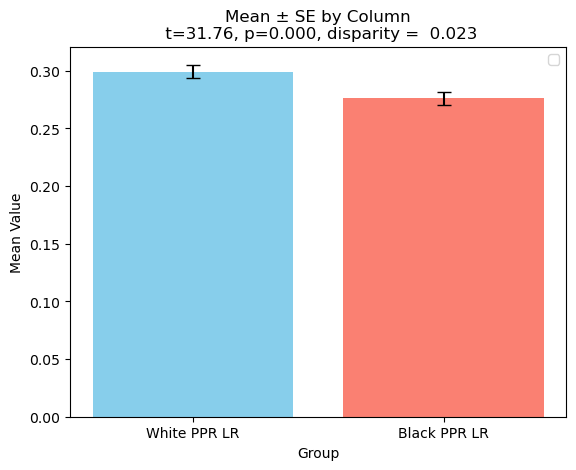

In [78]:
t_test_visualizer('White PPR LR', 'Black PPR LR', False, True, False, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0005615076268682597


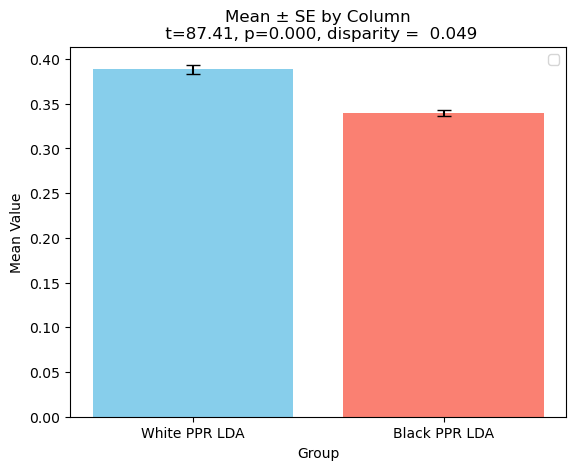

In [79]:
t_test_visualizer('White PPR LDA', 'Black PPR LDA', False, True, False, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0005717550534818873


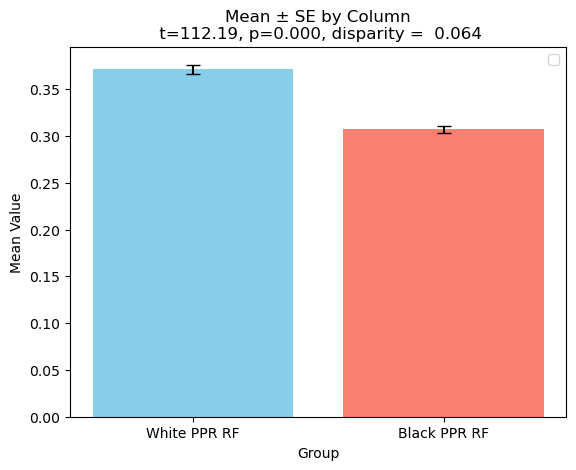

In [80]:
t_test_visualizer('White PPR RF', 'Black PPR RF', False, True, False, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0005597264611752314


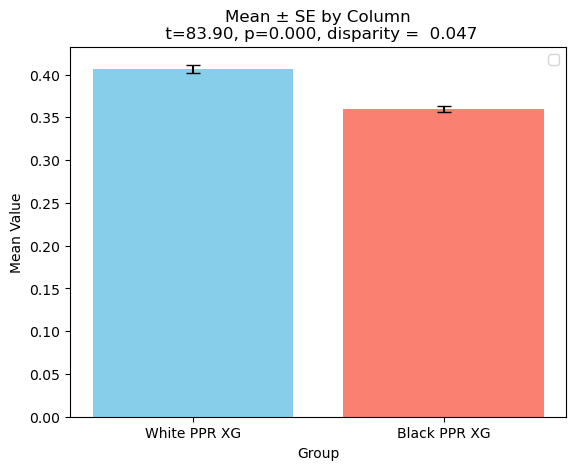

In [81]:
t_test_visualizer('White PPR XG', 'Black PPR XG', False, True, False, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0007361831847827351


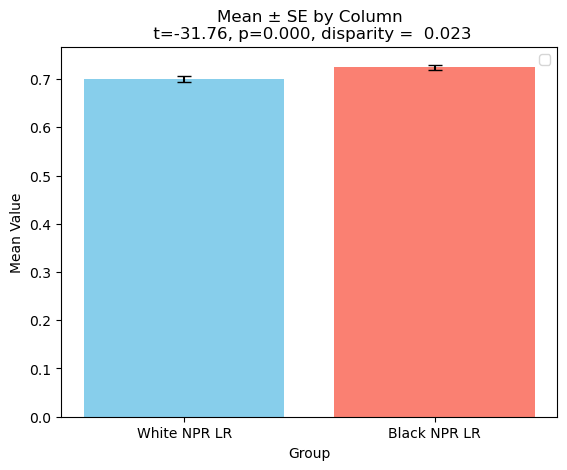

In [83]:
t_test_visualizer('White NPR LR', 'Black NPR LR', False, False, True, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0005717550534818873


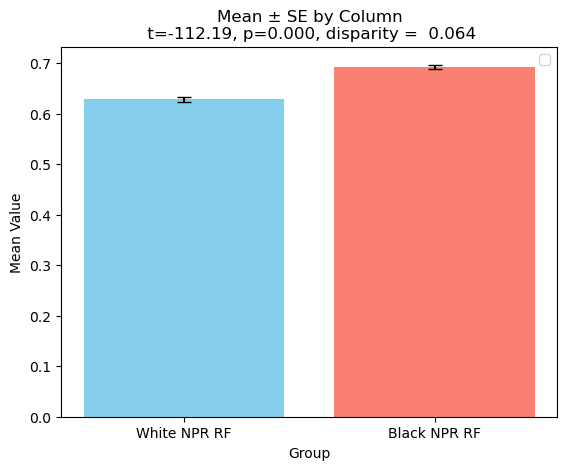

In [84]:
t_test_visualizer('White NPR RF', 'Black NPR RF', False, False, True, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0005615076268682598


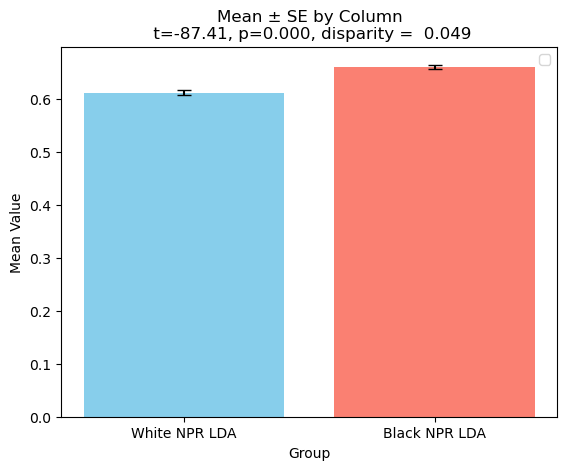

In [85]:
t_test_visualizer('White NPR LDA', 'Black NPR LDA', False, False, True, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0005597264611752314


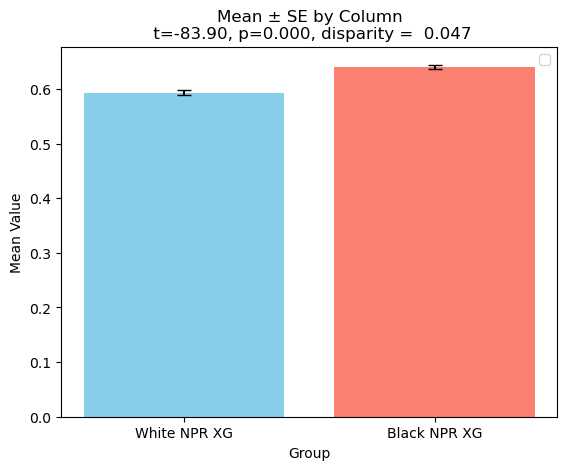

In [86]:
t_test_visualizer('White NPR XG', 'Black NPR XG', False, False, True, 0.05)